# Stabilirea baseline-ului

> *by Popescu Ionut-Alexandru*

# Citirea si pregatirea datelor

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
#Citirea si transformarea datei din string in data calendaristica
cases_per_day = pd.read_csv('cases_per_day.csv')
cases_per_day.index = pd.to_datetime(cases_per_day['Date'])
cases_per_day = cases_per_day.drop('Date',axis=1)

In [25]:
display(cases_per_day.head())

,NumberOfCases,NumberOfFatalities,Weekday
Date,,,
2020-02-26,1,0,Wednesday
2020-02-27,0,0,Thursday
2020-02-28,2,0,Friday
2020-02-29,0,0,Saturday
2020-03-01,0,0,Sunday


# Utilizarea metodei 'naive' pentru vizualizarea numarului de cazuri

In [4]:
#Utilizarea librariei forecast_x pentru crearea modeluilui 'Naive'
from forecast_x import forecast_x as fx

In [26]:
freq = 1
h = 31

f = fx.forecast(list(cases_per_day['NumberOfCases'].values),freq,h)

model = f.model_naive()

In [27]:
#Crearea datelor pentru luna previzionata
time_to_start = '2020-04-08'
time_to_stop = '2020-05-08'
dates = pd.date_range(time_to_start,time_to_stop).tolist()

In [29]:
#Determinarea numarul de cazuri pe zile
forecast_naive = pd.DataFrame(model[2],columns=['NaiveForecastCases'],index=dates)
forecast_naive.head(5)

,NaiveForecastCases
2020-04-08,360
2020-04-09,360
2020-04-10,360
2020-04-11,360
2020-04-12,360


Text(0.5, 1.0, 'Forecasting with Naive method for 08-04-2020 - 08-05-2020')

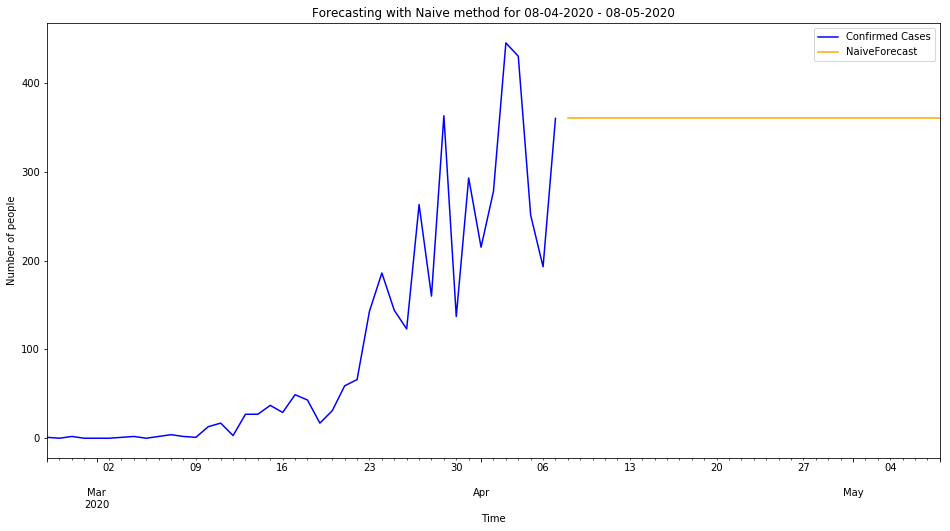

In [30]:
#Vizualizarea numarului de cazuri confirmate
f,ax = plt.subplots(figsize=(16,8))
cases_per_day['NumberOfCases'].plot(color='blue',ax=ax)
forecast_naive['NaiveForecastCases'].plot(color='orange',ax=ax)
plt.xlabel('Time')
plt.ylabel('Number of people')
plt.legend(['Confirmed Cases','NaiveForecast'])
plt.title('Forecasting with Naive method for 08-04-2020 - 08-05-2020')

In [31]:
#Crearea modelului 'naive' pentru numarul de decese
f = fx.forecast(list(cases_per_day['NumberOfFatalities'].values),freq,h)

model = f.model_naive()

forecast_naive['NaiveForecastFatalities'] = model[2]
forecast_naive.head(5)

,NaiveForecastCases,NaiveForecastFatalities
2020-04-08,360,25
2020-04-09,360,25
2020-04-10,360,25
2020-04-11,360,25
2020-04-12,360,25


Text(0.5, 1.0, 'Forecasting with Naive method for 08-04-2020 - 08-05-2020')

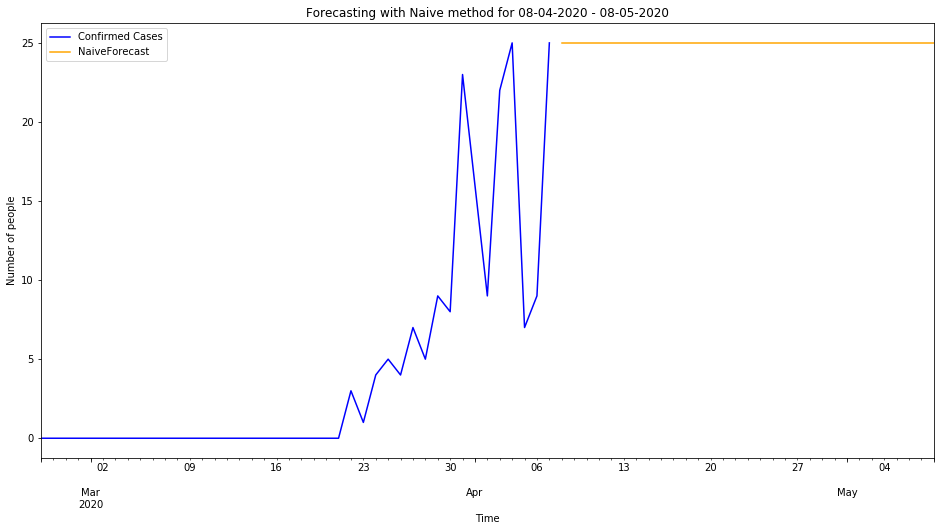

In [32]:
#Vizualizarea numarului de decese
f,ax = plt.subplots(figsize=(16,8))
cases_per_day['NumberOfFatalities'].plot(color='blue',ax=ax)
forecast_naive['NaiveForecastFatalities'].plot(color='orange',ax=ax)
plt.xlabel('Time')
plt.ylabel('Number of people')
plt.legend(['Confirmed Cases','NaiveForecast'])
plt.title('Forecasting with Naive method for 08-04-2020 - 08-05-2020')

In [33]:
#Vizualizarea numarului total de cazuri confirmate si decese
number_of_cases = sum(cases_per_day['NumberOfCases'])+sum(forecast_naive['NaiveForecastCases'])
print(f'Number of cases confirmed for Romania until 08-05-2020: {number_of_cases}')
number_of_fatalities = sum(cases_per_day['NumberOfFatalities'])+sum(forecast_naive['NaiveForecastFatalities'])
print(f'Number of fatalities confirmed for Romania until 08-05-2020: {number_of_fatalities}')

Number of cases confirmed for Romania until 08-05-2020: 15577
Number of fatalities confirmed for Romania until 08-05-2020: 957


# Utilizarea metodei 'naive' pentru vizualizarea numarului de cazuri

In [35]:
#Impartirea datelor in train si test
test_size = int(len(cases_per_day)*0.25) 
train = cases_per_day.iloc[:-test_size]
test = cases_per_day.iloc[-test_size:]

In [44]:
#Stabilirea baseline-lui pentru setul de cazuri confirmate
freq = 1
h = 10

f = fx.forecast(list(train['NumberOfCases'].values),freq,h)

model = f.model_naive()

In [45]:
testing_naive_cases = pd.DataFrame(zip(test['NumberOfCases'].tolist(),model[2]),columns=['Test','NaiveForecast'],index=test.index)

Text(0.5, 1.0, 'Forecasting with Naive method for 08-04-2020 - 08-05-2020')

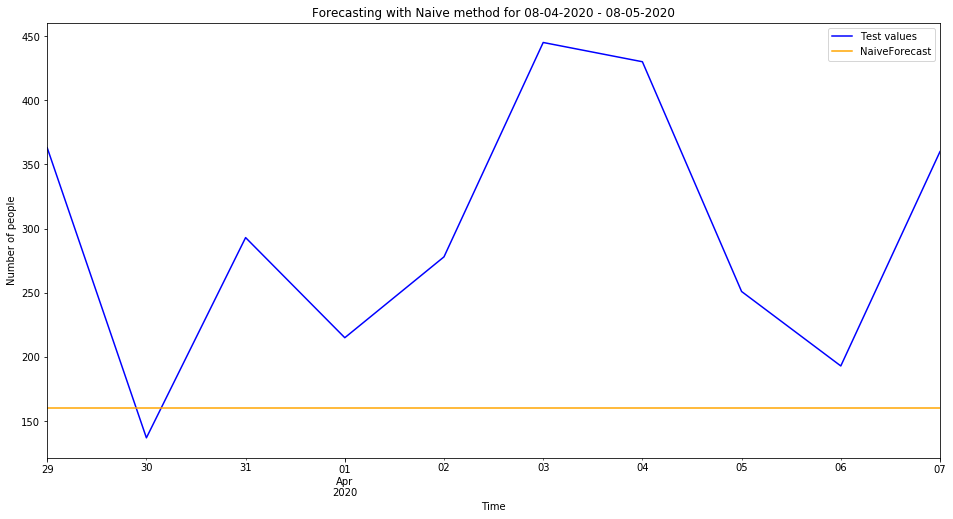

In [46]:
f,ax = plt.subplots(figsize=(16,8))
testing_naive_cases['Test'].plot(color='blue',ax=ax)
testing_naive_cases['NaiveForecast'].plot(color='orange',ax=ax)
plt.xlabel('Time')
plt.ylabel('Number of people')
plt.legend(['Test values','NaiveForecast'])
plt.title('Forecasting with Naive method for 08-04-2020 - 08-05-2020')

In [47]:
#Crearea functiei de calcularea a MSLE
def mean_squared_logarithmic_error(y_test,y_pred):
    return np.mean(np.square(np.log([y-1 for y in y_test])-np.log([y-1 for y in y_pred])))

In [55]:
#Stabilirea baseline-ului pentru cazurile confirmate
msle = mean_squared_logarithmic_error(testing_naive_cases['Test'].values.tolist(),testing_naive_cases['NaiveForecast'].values.tolist())
print(f'Baseline-ul pentru numarul de cazuri confirmate este MSLE = : {msle}')

Baseline-ul pentru numarul de cazuri confirmate este MSLE = : 0.4410576064776728


In [50]:
#Stabilirea baseline-lui pentru setul de decese
freq = 1
h = 10

f = fx.forecast(list(train['NumberOfFatalities'].values),freq,h)

model = f.model_naive()

In [51]:
testing_naive_fatalities = pd.DataFrame(zip(test['NumberOfFatalities'].tolist(),model[2]),columns=['Test','NaiveForecast'],index=test.index)

Text(0.5, 1.0, 'Forecasting with Naive method for 08-04-2020 - 08-05-2020')

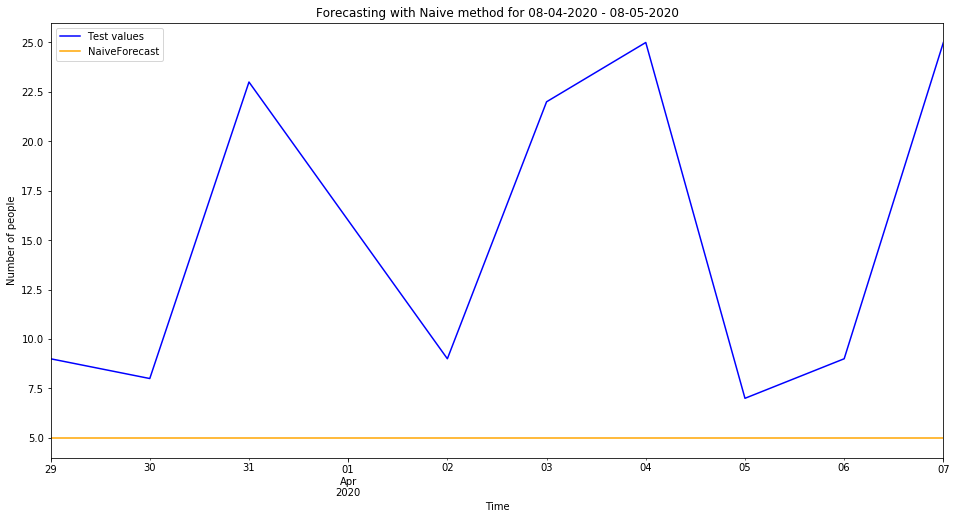

In [52]:
f,ax = plt.subplots(figsize=(16,8))
testing_naive_fatalities['Test'].plot(color='blue',ax=ax)
testing_naive_fatalities['NaiveForecast'].plot(color='orange',ax=ax)
plt.xlabel('Time')
plt.ylabel('Number of people')
plt.legend(['Test values','NaiveForecast'])
plt.title('Forecasting with Naive method for 08-04-2020 - 08-05-2020')

In [54]:
#Stabilirea baseline-ului pentru cazurile confirmate
msle = mean_squared_logarithmic_error(testing_naive_fatalities['Test'].values.tolist(),testing_naive_fatalities['NaiveForecast'].values.tolist())
print(f'Baseline-ul pentru numarul de decese este MSLE = : {msle}')

Baseline-ul pentru numarul de decese este MSLE = : 1.5742659729445325
